In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("log_9.csv", index_col=0)

In [11]:
df

,value,action,reward
0,1.000000e+08,1.0,-0.004622
1,1.000000e+08,0.0,-0.009248
2,1.000000e+08,3.0,0.034390
3,1.000000e+08,2.0,-0.002311
4,1.000000e+08,1.0,0.000711
...,...,...,...
1982,9.000243e+07,2.0,0.000000
1983,9.000243e+07,4.0,0.009373
1984,9.000242e+07,3.0,-0.012184
1985,9.000242e+07,8.0,0.001172


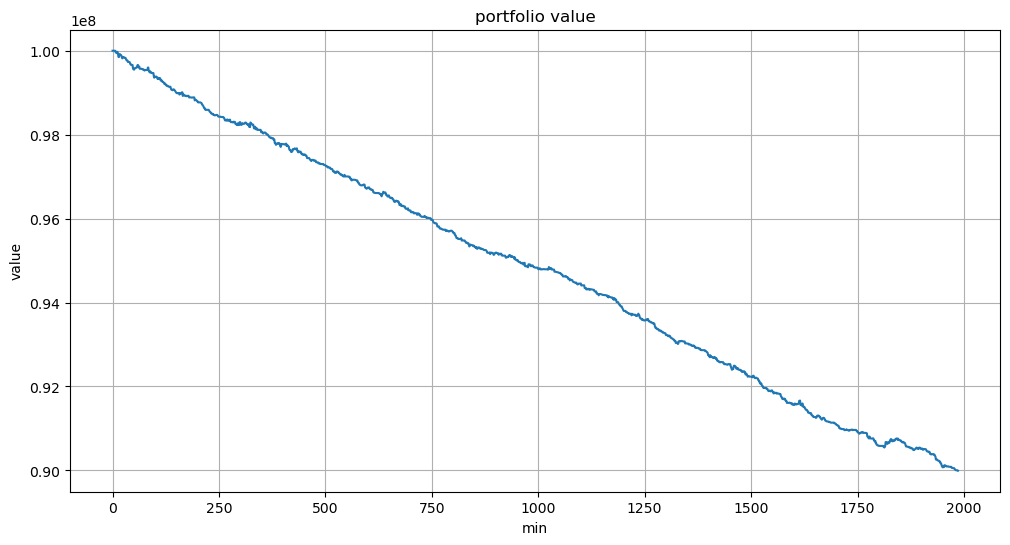

In [55]:
plt.figure(figsize=(12, 6))  
df['value'].plot(title="portfolio value")
plt.xlabel("min")  
plt.ylabel("value")
plt.grid(True)  
plt.show()  

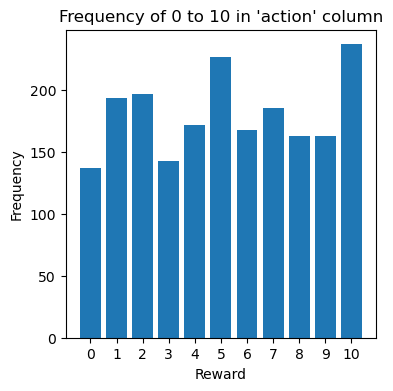

In [66]:
action_value_counts = df['action'].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(action_value_counts.index, action_value_counts.values)
plt.title("Frequency of 0 to 10 in 'action' column")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.xticks(range(11))
plt.show()

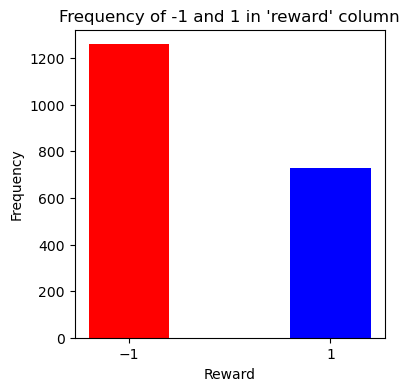

In [62]:
df['reward'] = df['reward'].apply(lambda x: 1 if x > 0 else -1)

reward_value_counts = df['reward'].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(reward_value_counts.index, reward_value_counts.values, color=['red', 'blue'])
plt.title("Frequency of -1 and 1 in 'reward' column")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.xticks([-1, 1])
plt.show()

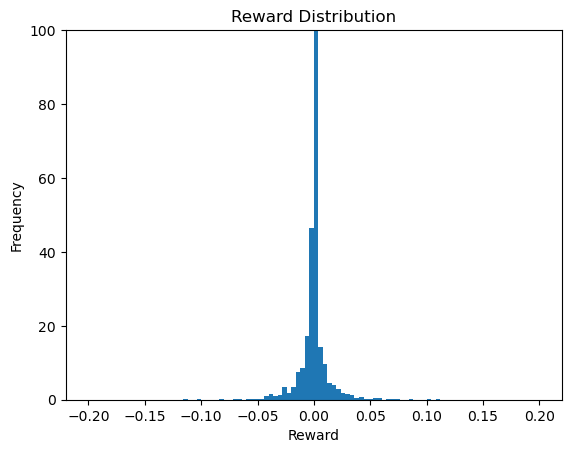

In [77]:
reward = round(df['reward'][df['reward'] != 1986], 4)

plt.hist(reward, bins=100, range=(-0.2, 0.2), density=True)
plt.ylim(0, 100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Reward Distribution')
plt.show()


In [82]:
reward.mean(), reward.std()

(-0.05049149471565174, 2.243409774714401)

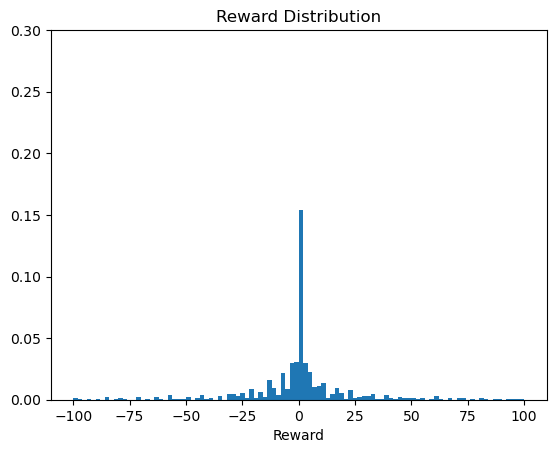

In [78]:
scaled_reward = df['reward']/0.000431

scaled_reward = round(scaled_reward.drop(1986), 0).to_frame()

plt.hist(scaled_reward, bins=100, range=(-100, 100), density=True)
plt.ylim(0, 0.3)
plt.xlabel('Reward')
plt.title('Reward Distribution')
plt.show()


In [80]:
scaled_reward.mean()[0], scaled_reward.std()[0]

(-0.391742195367573, 32.09208432555755)